In [1]:
# Built-ins
import sys, os, os.path

# Anaconda
from pylab import *
import pandas as pd
from scipy.stats import combine_pvalues

#Setup

In [75]:
DATADIR = "../data"  # results of all samples
#DATADIR = "../data.suppl"  # results of sub samples
fisherP = lambda pvals: combine_pvalues(pvals)[1]

#Adipose depots

In [79]:
FIG1X = "adipose_subcutaneous"
FIG1Y = "adipose_visceral_(omentum)"
path1x = os.path.join(DATADIR, FIG1X, "limmaResults_%s.tsv" % FIG1X)
path1y = os.path.join(DATADIR, FIG1Y, "limmaResults_%s.tsv" % FIG1Y)
df1x = pd.read_table(path1x)
df1y = pd.read_table(path1y)
df1 = pd.DataFrame({FIG1X: df1x['t'], FIG1Y: df1y['t'], 'qx': df1x["adj.P.Val"], 'qy': df1y["adj.P.Val"]})

In [80]:
df1['q.combined'] = df1[['qx', 'qy']].apply(fisherP, axis=1, raw=True)
df1['-logQ'] = -log10(df1['q.combined'])

In [81]:
df1.head()

,adipose_subcutaneous,adipose_visceral_(omentum),qx,qy,q.combined,-logQ
ENSG00000000419.8,0.783499,-0.404878,0.692005,0.880872,0.911307,0.040335
ENSG00000000457.9,-0.231371,-0.899866,0.923198,0.692040,0.925127,0.033799
ENSG00000000460.12,0.152463,-1.309704,0.949984,0.523378,0.844625,0.073336
ENSG00000000938.8,-3.107958,-1.032843,0.025100,0.636718,0.082087,1.085726
ENSG00000000971.11,-0.577944,0.934446,0.785881,0.677338,0.867945,0.061508


In [82]:
df1.describe()

,adipose_subcutaneous,adipose_visceral_(omentum),qx,qy,q.combined,-logQ
count,29242.000000,29242.000000,2.924200e+04,2.924200e+04,2.924200e+04,29242.000000
mean,-0.089957,-0.051119,5.116126e-01,6.152155e-01,5.720040e-01,0.456431
std,1.783301,1.421653,3.264667e-01,2.735065e-01,3.219268e-01,0.930902
min,-11.547009,-10.547693,1.125501e-45,4.619787e-17,1.534214e-47,0.000009
25%,-1.190375,-1.023309,1.990151e-01,3.875354e-01,2.880707e-01,0.060240
50%,-0.098356,-0.036375,5.432811e-01,6.615535e-01,6.276740e-01,0.202266
75%,1.004853,0.933127,8.143832e-01,8.625469e-01,8.704829e-01,0.540501
max,17.366098,7.760234,9.999959e-01,9.999797e-01,9.999781e-01,46.814114


In [83]:
df1.corr()

,adipose_subcutaneous,adipose_visceral_(omentum),qx,qy,q.combined,-logQ
adipose_subcutaneous,1.000000,0.360237,0.052350,0.069742,0.061872,-0.016037
adipose_visceral_(omentum),0.360237,1.000000,0.063127,0.065984,0.071633,-0.045879
qx,0.052350,0.063127,1.000000,0.149217,0.845333,-0.491478
qy,0.069742,0.065984,0.149217,1.000000,0.568627,-0.288456
q.combined,0.061872,0.071633,0.845333,0.568627,1.000000,-0.574753
-logQ,-0.016037,-0.045879,-0.491478,-0.288456,-0.574753,1.000000


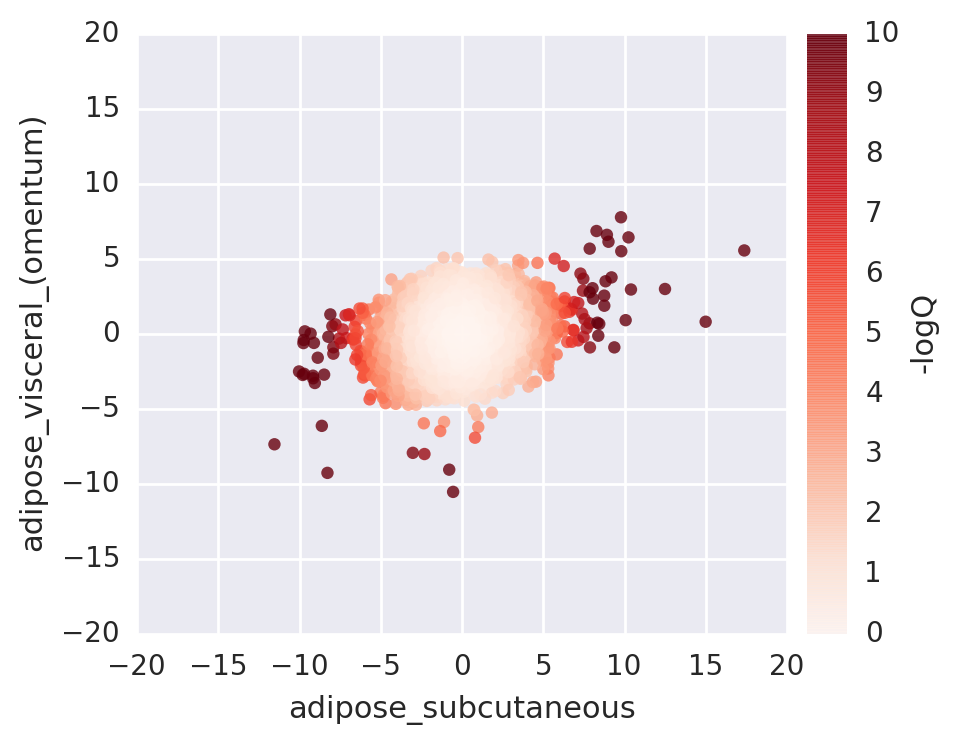

In [86]:
fig = figure(figsize=(5,4))

ax1 = fig.add_axes([0.15, 0.15, 0.65, 0.75])  # [left, bottom, width, height]
ax2 = fig.add_axes([0.82, 0.15, 0.04, 0.75])

#ax1.axvline(linestyle='--', lw=1, color='grey', alpha=0.2)
#ax1.axhline(linestyle='--', lw=1, color='grey', alpha=0.2)
p1 = ax1.scatter(x=df1[FIG1X], y=df1[FIG1Y], c=df1['-logQ'], lw=0, alpha=0.8, cmap='Reds', vmax=10)
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_xlabel(FIG1X)
ax1.set_ylabel(FIG1Y)

colorbar(p1, cax=ax2)
ax2.set_ylabel('-logQ')

fig.savefig('adipose_depots.t_vs_t.png')
fig.savefig('adipose_depots.t_vs_t.pdf')

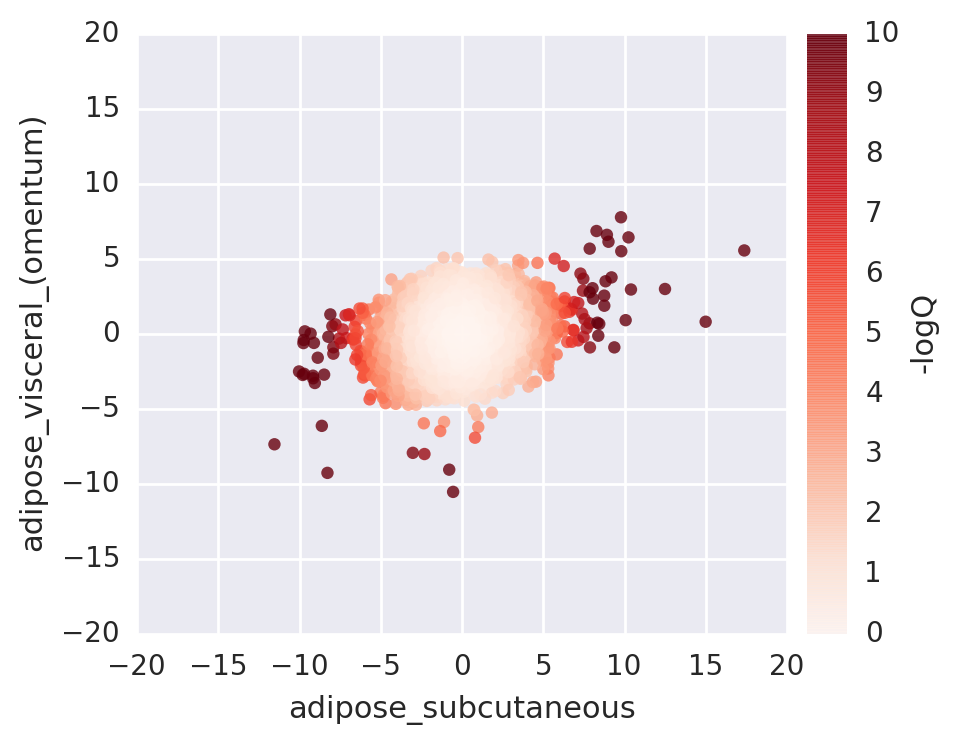

In [93]:
fig = figure(figsize=(5,4))

ax1 = fig.add_axes([0.15, 0.15, 0.65, 0.75])  # [left, bottom, width, height]
ax2 = fig.add_axes([0.82, 0.15, 0.04, 0.75])

#ax1.axvline(linestyle='--', lw=1, color='grey', alpha=0.2)
#ax1.axhline(linestyle='--', lw=1, color='grey', alpha=0.2)
p1 = ax1.scatter(x=df1[FIG1X], y=df1[FIG1Y], c=df1['-logQ'], lw=0, alpha=0.8, cmap='Reds', vmax=10, \
                 label="sexual dimorphic gene expression")
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_xlabel(FIG1X)
ax1.set_ylabel(FIG1Y)

colorbar(p1, cax=ax2)
ax2.set_ylabel('-logQ')

pickle.dump(fig, open('pickled.fig', 'wb'))
#fig.savefig('adipose_depots.t_vs_t.png')
#fig.savefig('adipose_depots.t_vs_t.pdf')

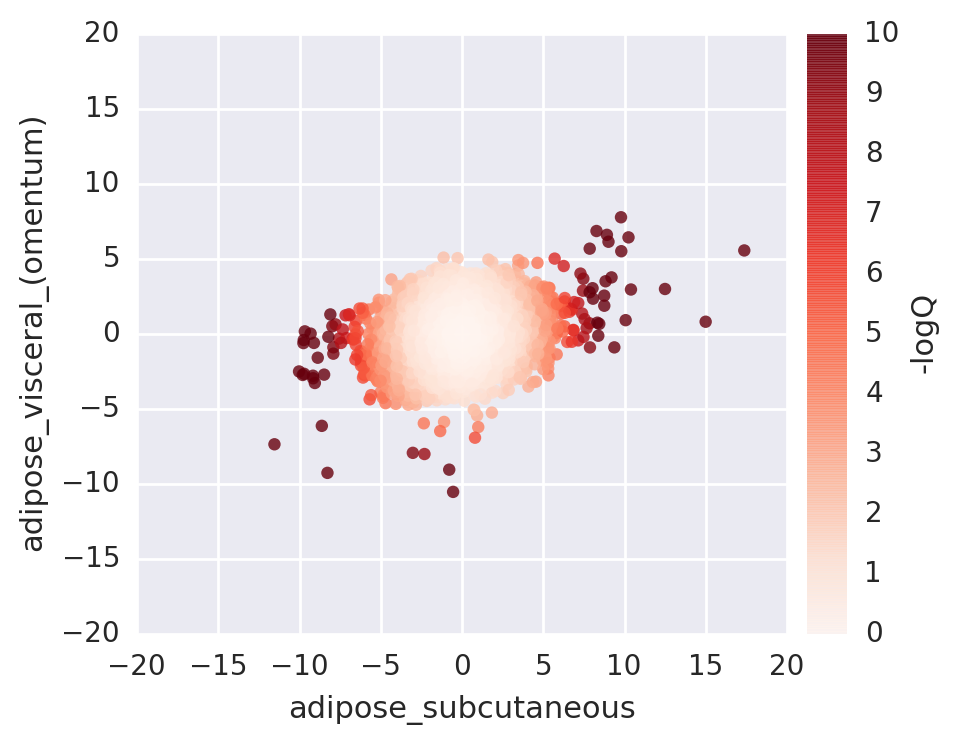

In [92]:
fig

In [91]:
import pickle
pickle.dump(fig, open('pickled.fig', 'wb'))